In [165]:
# System
from time import time

# Data
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.contrib.missing import MissingValuesBar

%matplotlib inline

# Modeling
from pycaret.classification import *

# Explainability
import shap

In [2]:
data = pd.read_csv("../../data/final_project.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [3]:
features = data.columns[pd.Series(data.columns).str.startswith('x')].to_list()
target = data.columns[pd.Series(data.columns).str.startswith('y')].to_list()
print(f"Features: Length: {len(features)}, Values: {features} ")
print(f"Target: {target}")

Features: Length: 50, Values: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49'] 
Target: ['y']


In [4]:
for feature in data[features].select_dtypes('object').columns:
    print(f"\nFeature: {feature}")
    print(data[feature].value_counts())


Feature: x24
asia       138965
euorpe      16538
america      4469
Name: x24, dtype: int64

Feature: x29
July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
Dev           23
January        9
Name: x29, dtype: int64

Feature: x30
wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
Name: x30, dtype: int64

Feature: x32
0.01%     40767
-0.01%    34094
0.0%      33923
-0.0%     30492
-0.02%     9924
0.02%      7987
-0.03%     1727
0.03%       855
-0.04%      138
0.04%        55
-0.05%        6
0.05%         1
Name: x32, dtype: int64

Feature: x37
$237.4       6
$-311.26     6
$618.22      6
$-415.46     6
$-336.77     6
            ..
$-956.22     1
$-1184.52    1
$528.9       1
$1592.52     1
$794.06      1
Name: x37, Length: 129198, dtype: int64


In [5]:
data['x32'].replace(to_replace="%$", value="", regex=True, inplace=True)
data['x32'] = data['x32'].astype(float)

In [6]:
data['x37'].replace(to_replace="^\$", value="", regex=True, inplace=True)
data['x37'] = data['x37'].astype(float)

In [7]:
features_categorical = data[features].select_dtypes('object').columns
features_numerical = [feature for feature in features if feature not in features_categorical]

print(f"Features Categorical: Length: {len(features_categorical)}, Values: {features_categorical} ")
print(f"Features Numeric: Length: {len(features_numerical)}, Values: {features_numerical} ")

Features Categorical: Length: 3, Values: Index(['x24', 'x29', 'x30'], dtype='object') 
Features Numeric: Length: 47, Values: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49'] 


## Missing Values

In [8]:
# # Instantiate the visualizer
# plt.figure(figsize=(15,10))
# visualizer = MissingValuesBar(features=features)

# visualizer.fit(X=data[features], y=data[target].values) # Supply the targets via y
# _ = visualizer.show() # Finalize and render the figure

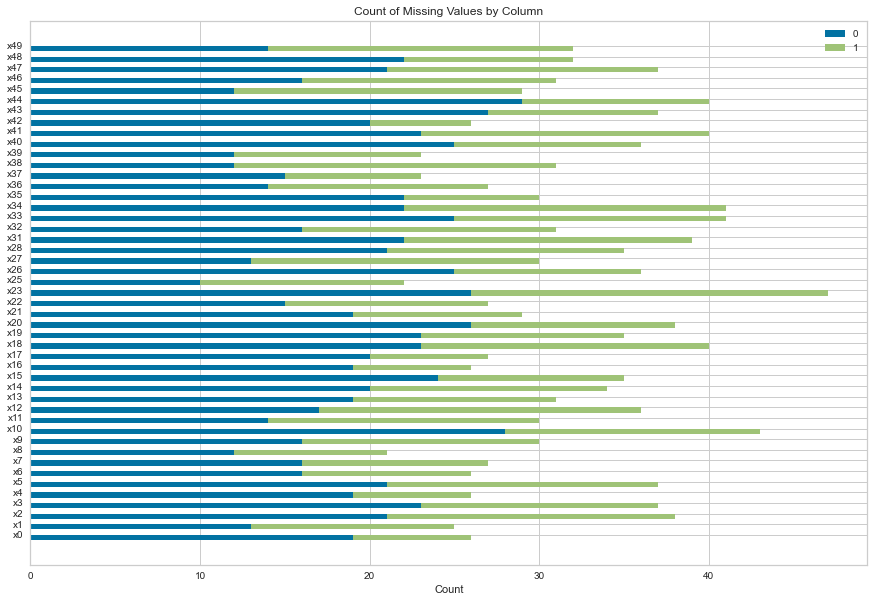

In [9]:
# Instantiate the visualizer
plt.figure(figsize=(15,10))
visualizer = MissingValuesBar(features=features_numerical)

visualizer.fit(X=data[features_numerical], y=data[target].values) # Supply the targets via y
_ = visualizer.show() # Finalize and render the figure

In [10]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      158392 non-null  float64
 1   x1      158392 non-null  float64
 2   x2      158392 non-null  float64
 3   x3      158392 non-null  float64
 4   x4      158392 non-null  float64
 5   x5      158392 non-null  float64
 6   x6      158392 non-null  float64
 7   x7      158392 non-null  float64
 8   x8      158392 non-null  float64
 9   x9      158392 non-null  float64
 10  x10     158392 non-null  float64
 11  x11     158392 non-null  float64
 12  x12     158392 non-null  float64
 13  x13     158392 non-null  float64
 14  x14     158392 non-null  float64
 15  x15     158392 non-null  float64
 16  x16     158392 non-null  float64
 17  x17     158392 non-null  float64
 18  x18     158392 non-null  float64
 19  x19     158392 non-null  float64
 20  x20     158392 non-null  float64
 21  x21     15

## Correlations

### Feature Correlations

<AxesSubplot:>

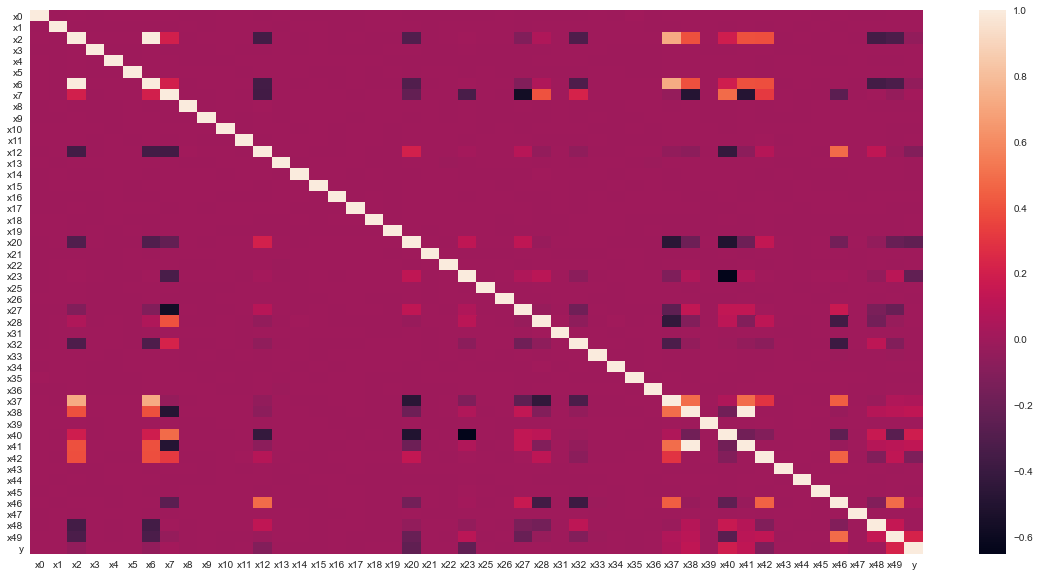

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr())

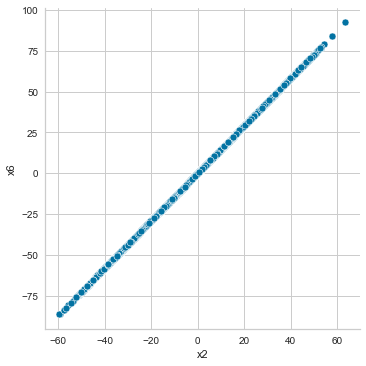

In [12]:
sns.relplot(x='x2', y = 'x6', data=data)

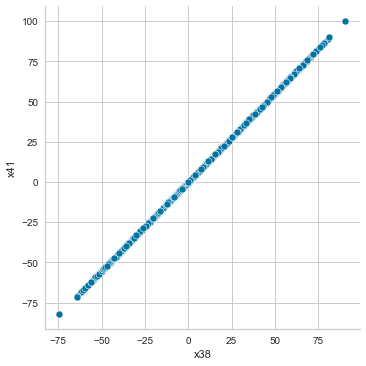

In [13]:
sns.relplot(x='x38', y = 'x41', data=data)

In [14]:
data.drop(columns=['x2', 'x6'], inplace=True)

In [15]:
features = data.columns[pd.Series(data.columns).str.startswith('x')].to_list()
features_categorical = data[features].select_dtypes('object').columns
features_numerical = [feature for feature in features if feature not in features_categorical]

print(f"Features Categorical: Length: {len(features_categorical)}, Values: {features_categorical} ")
print(f"Features Numeric: Length: {len(features_numerical)}, Values: {features_numerical} ")

Features Categorical: Length: 3, Values: Index(['x24', 'x29', 'x30'], dtype='object') 
Features Numeric: Length: 45, Values: ['x0', 'x1', 'x3', 'x4', 'x5', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49'] 


### Correlations to Target

Relation to target variable seems to be weak at best. But this may not be the right way to visualize. We should do histograms faceted by target

In [16]:
np.abs(data.corr()['y']).sort_values(ascending=False)

y      1.000000
x20    0.241660
x23    0.237010
x49    0.222356
x40    0.191780
x42    0.124892
x41    0.122538
x38    0.122538
x12    0.106962
x37    0.054629
x46    0.040904
x7     0.014671
x8     0.006446
x32    0.005654
x34    0.005198
x16    0.004468
x17    0.004135
x27    0.003836
x10    0.003481
x1     0.003381
x48    0.003198
x45    0.003114
x21    0.003075
x18    0.002833
x9     0.002749
x39    0.002341
x35    0.002246
x26    0.001995
x13    0.001935
x3     0.001870
x25    0.001870
x19    0.001670
x15    0.001599
x0     0.001581
x33    0.001529
x31    0.001499
x36    0.001453
x4     0.001050
x5     0.000966
x11    0.000786
x14    0.000780
x28    0.000632
x47    0.000542
x22    0.000127
x44    0.000121
x43    0.000088
Name: y, dtype: float64

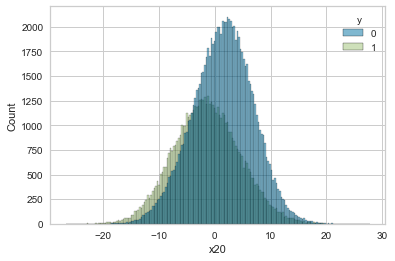

In [17]:
_ = sns.histplot(data=data, x="x20", hue="y")

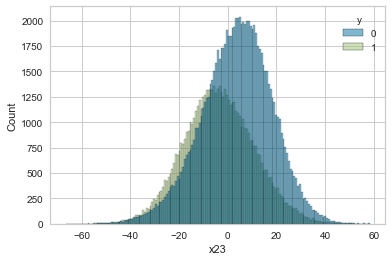

In [18]:
_ = sns.histplot(data=data, x="x23", hue="y")

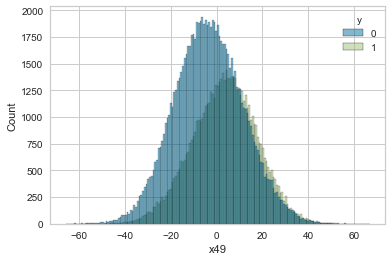

In [19]:
_ = sns.histplot(data=data, x="x49", hue="y")

## Automated Visualization

In [20]:
# https://github.com/AutoViML/AutoViz
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.79. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [21]:
AV = AutoViz_Class()

In [24]:
# ?AV.AutoViz

In [25]:
# ?data.sample

In [26]:
data_subset = data.sample(frac=0.1, random_state=42)

Shape of your Data Set: (15839, 49)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  45
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    48 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################### Binary-Class VISUALIZATION Started #####################


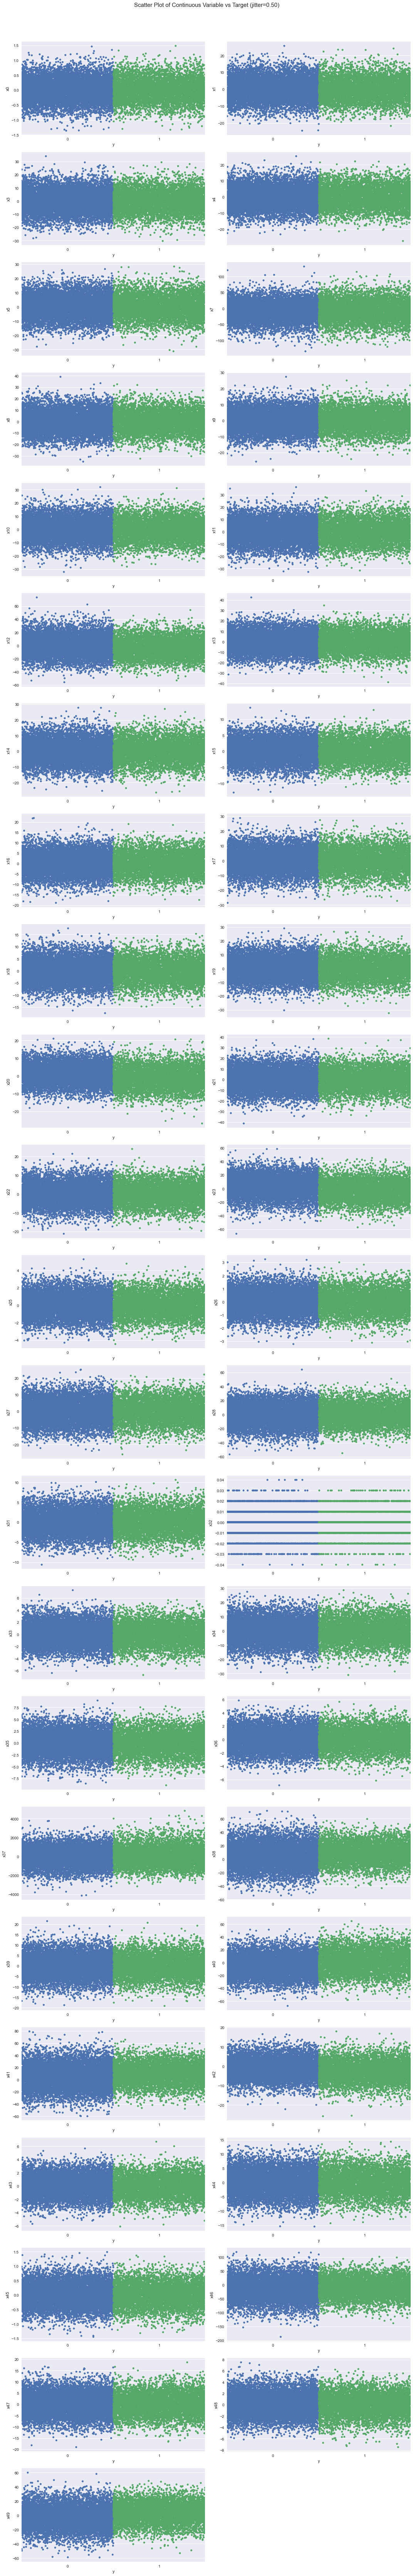

Total Number of Scatter Plots = 1035


ValueError: Image size of 1080x142560 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1080x142560 with 990 Axes>

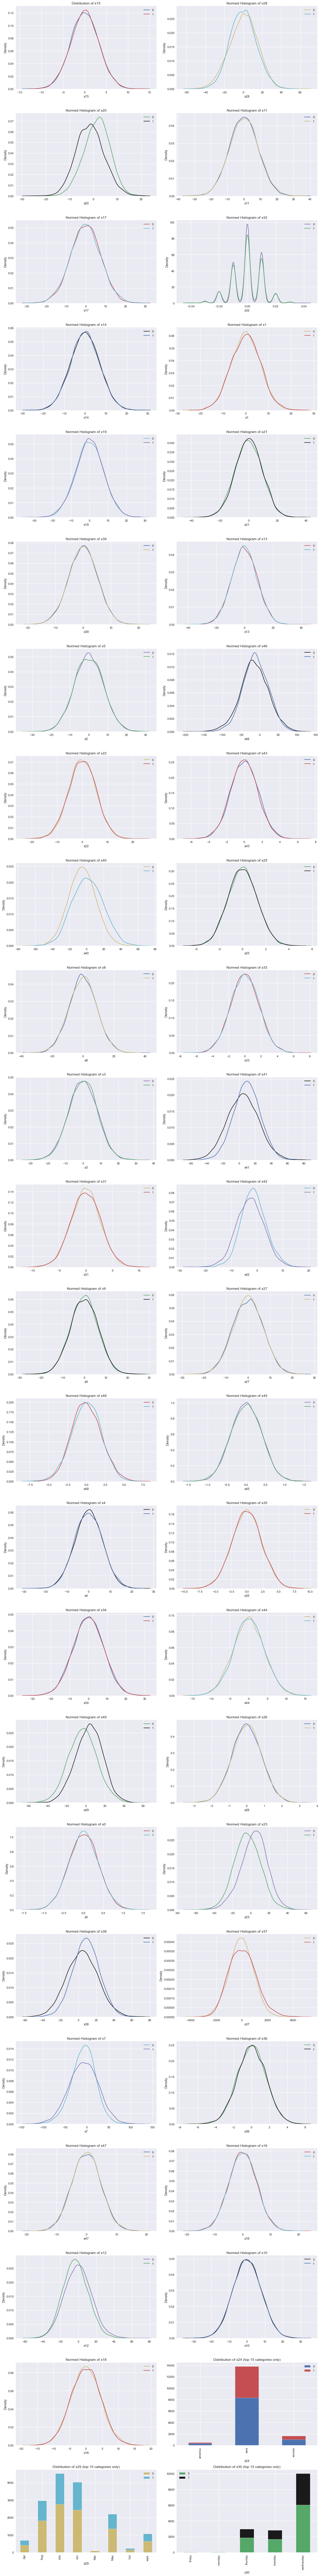

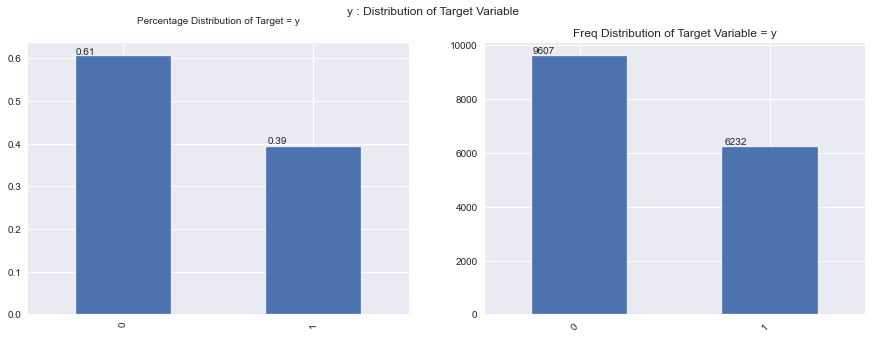

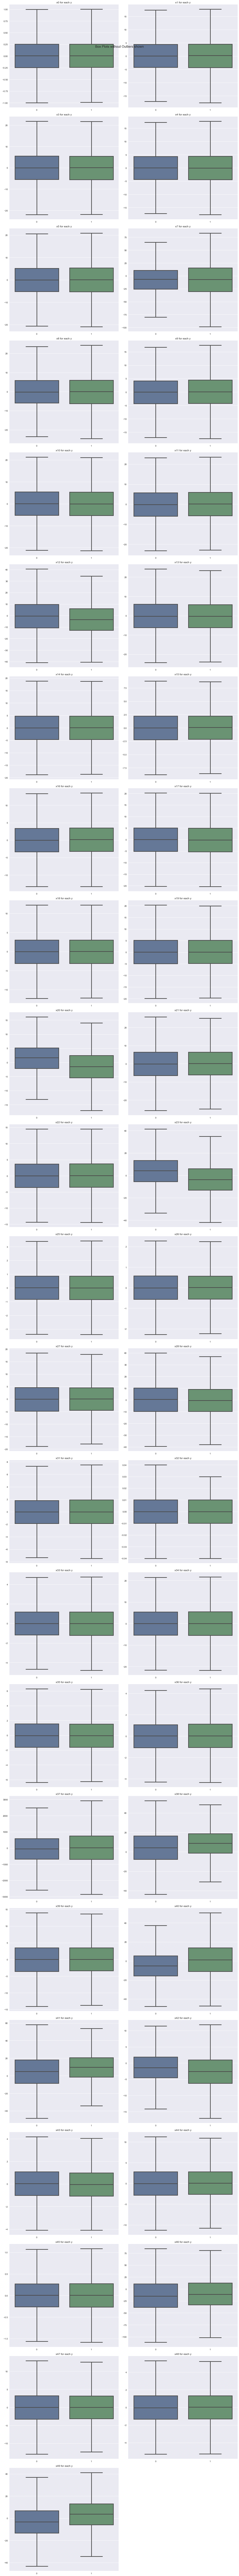

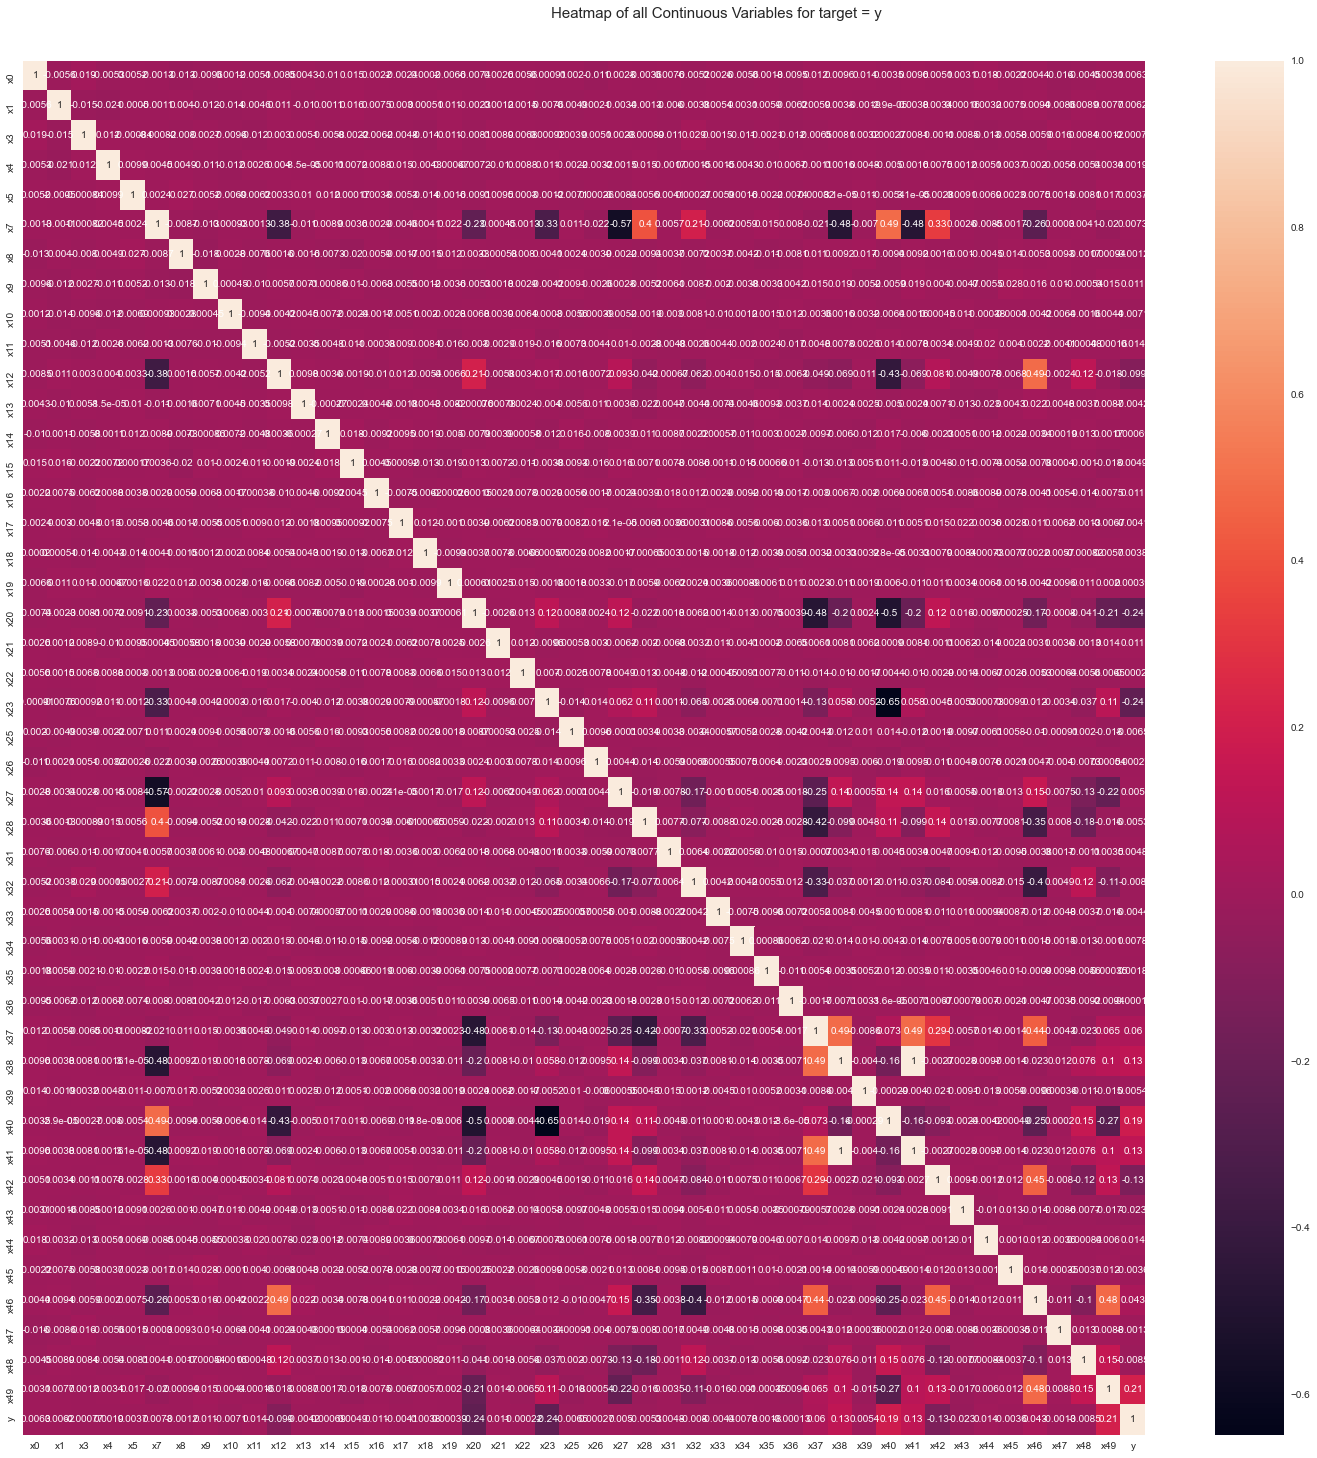

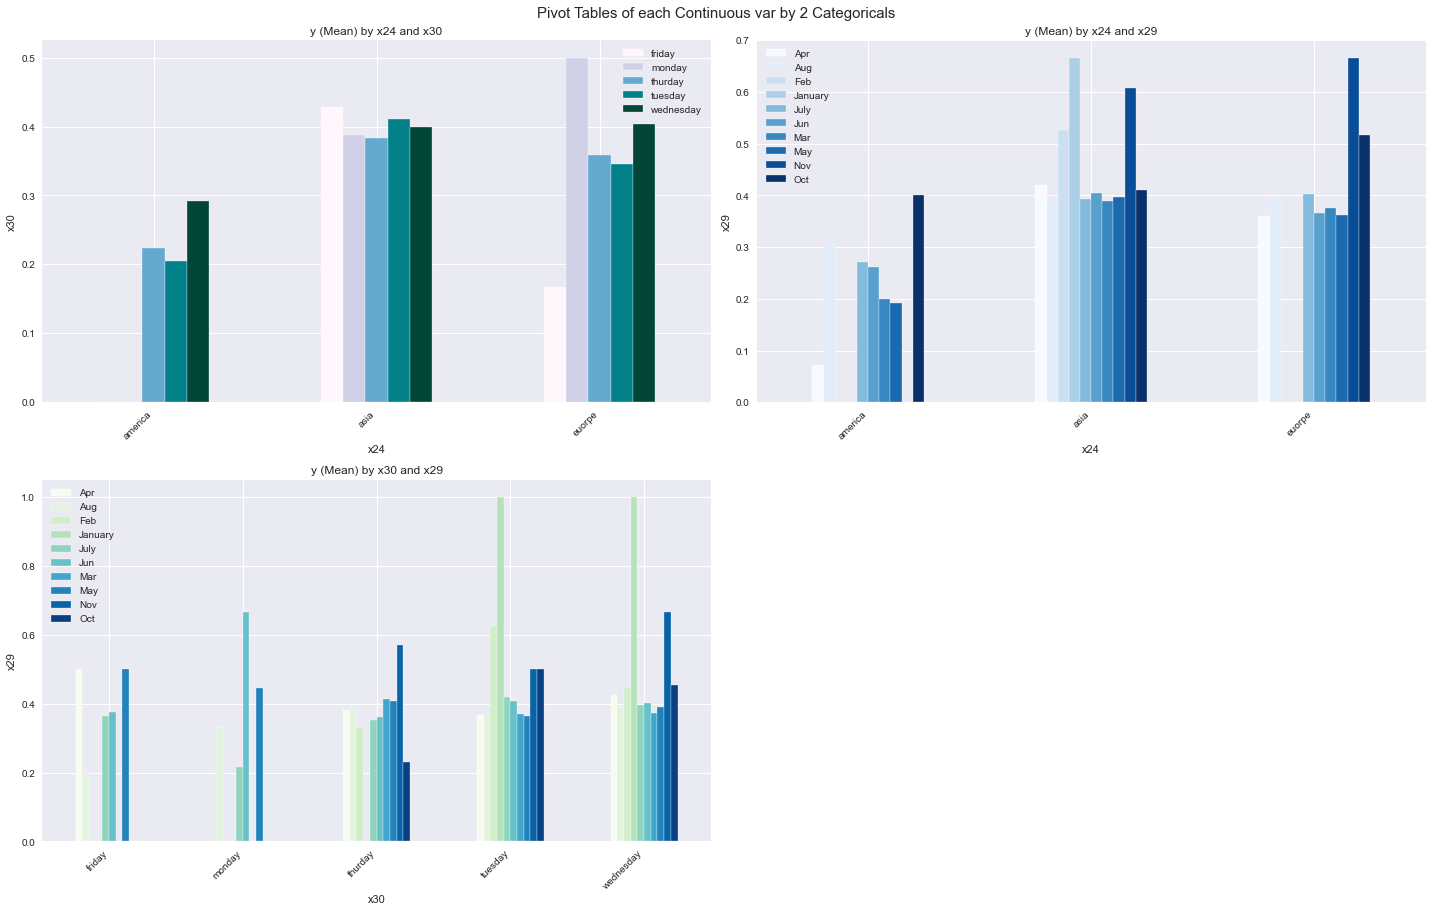

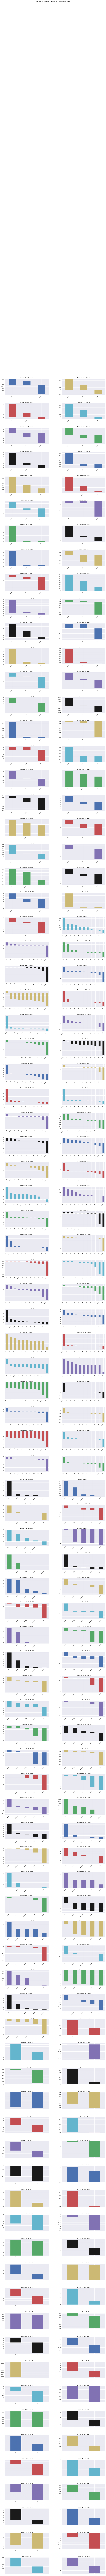

Time to run AutoViz (in seconds) = 191.889

 ###################### VISUALIZATION Completed ########################


In [27]:
filename = ""
dft = AV.AutoViz(
    filename="",
    sep=",",
    depVar="y",
    dfte=data_subset,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=10000000,
    max_cols_analyzed=100,
)

## Modeling

https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb

In [28]:
X = data[features]
y = data[target]

print(X.shape, y.shape)

(158392, 48) (158392, 1)


In [29]:
train = data.sample(frac=0.80, random_state=42)
test = data.drop(train.index)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(train.shape))
print('Unseen Data For Predictions: ' + str(test.shape))

Data for Modeling: (126714, 49)
Unseen Data For Predictions: (31678, 49)


### Setup

In [30]:
exp_01 = setup(
    data=train,
    target='y',
    train_size=0.8,
    data_split_stratify=True,
    fold=3,
    session_id=42,
    log_experiment=True,
    use_gpu=True
)

# Polynomial Features
# Feature Selection?
# combine_rare_levels
# pca

### Custom Metric

In [31]:
# check all metrics used for model evaluation
get_metrics()

Name Display Name  \
ID                                  
acc         Accuracy     Accuracy   
auc              AUC          AUC   
recall        Recall       Recall   
precision  Precision        Prec.   
f1                F1           F1   
kappa          Kappa        Kappa   
mcc              MCC          MCC   

                                              Score Function  \
ID                                                             
acc          <function accuracy_score at 0x0000022BA7346AF8>   
auc           <function roc_auc_score at 0x0000022BA7335E58>   
recall     <function binary_multiclass_score_func.<locals...   
precision  <function binary_multiclass_score_func.<locals...   
f1         <function binary_multiclass_score_func.<locals...   
kappa      <function cohen_kappa_score at 0x0000022BA734A...   
mcc        <function matthews_corrcoef at 0x0000022BA734A...   

                                                      Scorer      Target  \
ID                                                                         
acc                                                 accuracy        pred   
auc        make_scorer(roc_auc_score, needs_proba=True, e...  pred_proba   
recall                   make_scorer(wrapper, average=macro)        pred   
precision             make_scorer(wrapper, average=weighted)        pred   
f1                    make_scorer(wrapper, average=weighted)        pred   
kappa                         make_scorer(cohen_kappa_score)        pred   
mcc                           make_scorer(matthews_corrcoef)        pred   

                                                    Args  Greater is Better  \
ID                                                                            
acc                                                   {}               True   
auc        {'average': 'weighted', 'multi_class': 'ovr'}               True   
recall                              {'average': 'macro'}               True   
precision                        {'average': 'weighted'}               True   
f1                               {'average': 'weighted'}               True   
kappa                                                 {}               True   
mcc                                                   {}               True   

           Multiclass  Custom  
ID                             
acc              True   False  
auc              True   False  
recall           True   False  
precision        True   False  
f1               True   False  
kappa            True   False  
mcc              True   False

In [32]:
def single_instance_metric(row):
    if row['y_test'] == 0 and row['y_pred'] == 1: # False Positive
        return 10
    elif row['y_test'] == 1 and row['y_pred'] == 0: # False Negative
        return 500
    else: # Correct Predictions
        return 0

def fp10_fn500_func(y_test, y_pred):
    df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
    df['metric'] = df.apply(single_instance_metric, axis=1)
    return np.mean(df['metric'].values)

In [33]:
y_true = [1, 0, 1]
y_pred = [0, 0, 1]
fp10_fn500_func(y_true, y_pred)

166.66666666666666

In [34]:
add_metric(
    id='fp10_fn500',
    name='fp10_fn500',
    score_func=fp10_fn500_func,
    target='pred',
    greater_is_better=False)

Name                                                        fp10_fn500
Display Name                                                fp10_fn500
Score Function        <function fp10_fn500_func at 0x0000022BB5C3AEE8>
Scorer               make_scorer(fp10_fn500_func, greater_is_better...
Target                                                            pred
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: fp10_fn500, dtype: object

In [35]:
# remove_metric('fp10_fn500')

In [36]:
get_metrics()

Name Display Name  \
ID                                    
acc           Accuracy     Accuracy   
auc                AUC          AUC   
recall          Recall       Recall   
precision    Precision        Prec.   
f1                  F1           F1   
kappa            Kappa        Kappa   
mcc                MCC          MCC   
fp10_fn500  fp10_fn500   fp10_fn500   

                                               Score Function  \
ID                                                              
acc           <function accuracy_score at 0x0000022BA7346AF8>   
auc            <function roc_auc_score at 0x0000022BA7335E58>   
recall      <function binary_multiclass_score_func.<locals...   
precision   <function binary_multiclass_score_func.<locals...   
f1          <function binary_multiclass_score_func.<locals...   
kappa       <function cohen_kappa_score at 0x0000022BA734A...   
mcc         <function matthews_corrcoef at 0x0000022BA734A...   
fp10_fn500   <function fp10_fn500_func at 0x0000022BB5C3AEE8>   

                                                       Scorer      Target  \
ID                                                                          
acc                                                  accuracy        pred   
auc         make_scorer(roc_auc_score, needs_proba=True, e...  pred_proba   
recall                    make_scorer(wrapper, average=macro)        pred   
precision              make_scorer(wrapper, average=weighted)        pred   
f1                     make_scorer(wrapper, average=weighted)        pred   
kappa                          make_scorer(cohen_kappa_score)        pred   
mcc                            make_scorer(matthews_corrcoef)        pred   
fp10_fn500  make_scorer(fp10_fn500_func, greater_is_better...        pred   

                                                     Args  Greater is Better  \
ID                                                                             
acc                                                    {}               True   
auc         {'average': 'weighted', 'multi_class': 'ovr'}               True   
recall                               {'average': 'macro'}               True   
precision                         {'average': 'weighted'}               True   
f1                                {'average': 'weighted'}               True   
kappa                                                  {}               True   
mcc                                                    {}               True   
fp10_fn500                                             {}              False   

            Multiclass  Custom  
ID                              
acc               True   False  
auc               True   False  
recall            True   False  
precision         True   False  
f1                True   False  
kappa             True   False  
mcc               True   False  
fp10_fn500        True    True

### Baseline Model

In [ ]:
# ?compare_models
# models()

In [37]:
start = time()
best_model = compare_models(
    sort='fp10_fn500',
    exclude = ['gbc', 'ada', 'catboost'], # Slow Model(s)
    turbo=True # Dont run slow models
)
end = time()

In [38]:
print(f"Training Time: {end-start}s")

Training Time: 350.4135012626648s


In [39]:
# # pull the score grid of compare_models as a dataframe
# pull()

In [40]:
print(best_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=0)


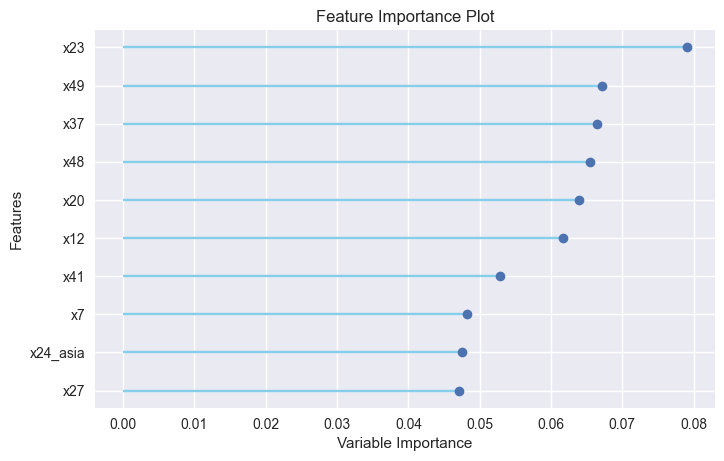

In [41]:
plot_model(best_model, plot='feature')

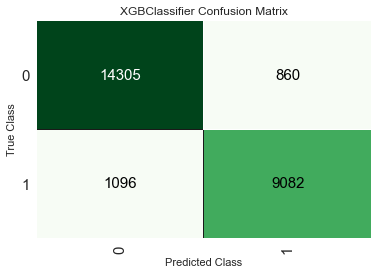

In [42]:
plot_model(best_model, plot = 'confusion_matrix')

### Explainability

#### Inbuilt in PyCaret

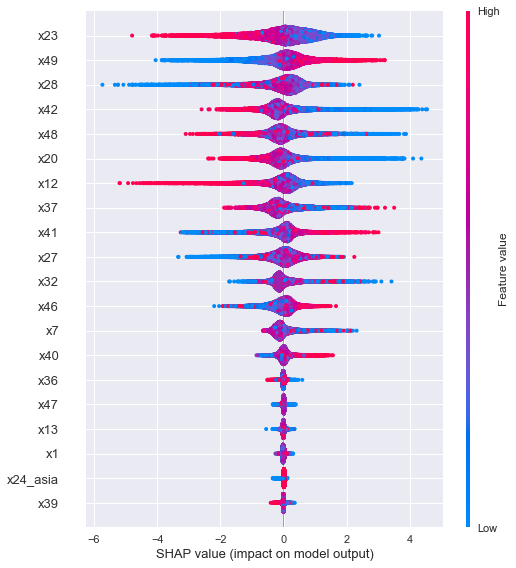

In [115]:
# SHAPLEY Explanation:
# https://www.analyticsvidhya.com/blog/2019/11/shapley-value-machine-learning-interpretability-game-theory/
# This shows the Shap values on the x-axis. 
# Here, all the values on the left represent the observations that shift the predicted value in the negative direction 
# while the points on the right contribute to shifting the prediction in a positive direction. 
# All the features are on the left y-axis.

interpret_model(best_model, plot = 'summary')

# https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
# This plot is made of all the dots in the train data. It demonstrates the following information:

#     Feature importance: Variables are ranked in descending order.
#     Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
#     Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
#     Correlation: 
#       - A high level of the “x23” content has a high and negative impact on the 'y'. 
#       - The “high” comes from the red color, and the “negative” impact is shown on the X-axis.
#       - Similarly, we will say the “x49” is positively correlated with the target variable.

#### Manually recreating PyCaret plots for Interpretibility

In [117]:
help(get_config)

Help on function get_config in module pycaret.classification:

get_config(variable: str)
    This function retrieves the global variables created when initializing the 
    ``setup`` function. Following variables are accessible:
    
    - X: Transformed dataset (X)
    - y: Transformed dataset (y)  
    - X_train: Transformed train dataset (X)
    - X_test: Transformed test/holdout dataset (X)
    - y_train: Transformed train dataset (y)
    - y_test: Transformed test/holdout dataset (y)
    - seed: random state set through session_id
    - prep_pipe: Transformation pipeline
    - fold_shuffle_param: shuffle parameter used in Kfolds
    - n_jobs_param: n_jobs parameter used in model training
    - html_param: html_param configured through setup
    - create_model_container: results grid storage container
    - master_model_container: model storage container
    - display_container: results display container
    - exp_name_log: Name of experiment
    - logging_param: log_experiment par

In [122]:
X_train_transformed= get_config('X_train')
# X_train_transformed.info()

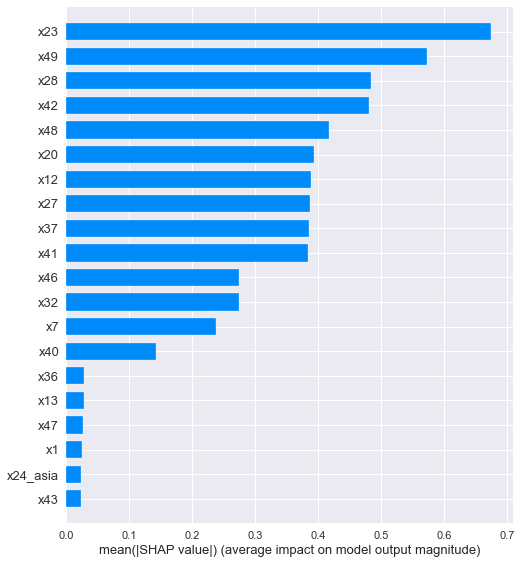

In [121]:
# https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
# This is slightly different from the plot above which is probably using a different method for feature importance
shap_values = shap.TreeExplainer(best_model).shap_values(X_train_transformed)
shap.summary_plot(shap_values, X_train_transformed, plot_type="bar")

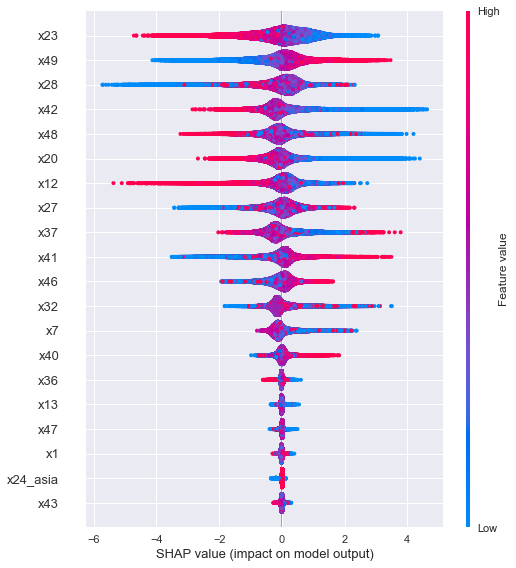

In [123]:
# Same as above but since the shapley values are calculated using a different method (most likely),
# the results are slightly different
shap.summary_plot(shap_values, X_train_transformed)

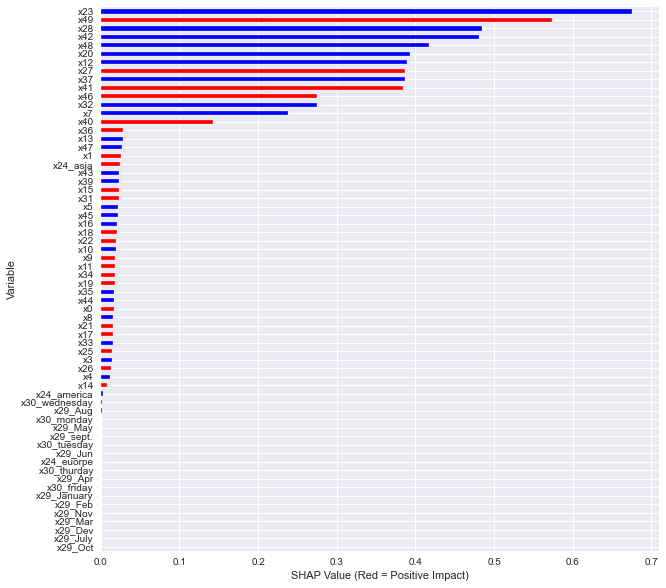

In [144]:
# Simplified Version of the above plot
def ABS_SHAP(df_shap,df, figsize=(5,6)):
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=figsize,legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

ABS_SHAP(shap_values,X_train_transformed, figsize=(10,10)) 

#### Partial Dependence Plots

https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d


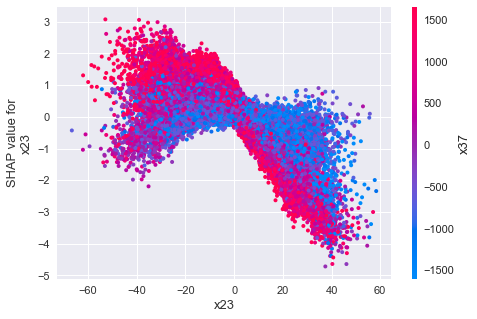

In [124]:
# Shows the negative correlation of 'x23'
# Also shows that 'x23' is most highly interacting with x37 (color)
shap.dependence_plot("x23", shap_values, X_train_transformed)

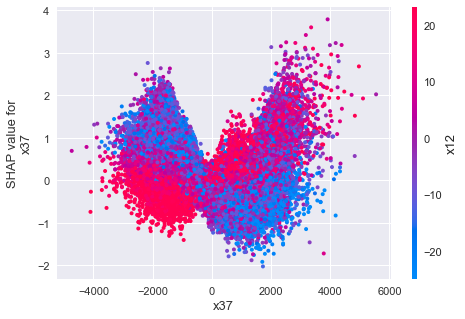

In [125]:
shap.dependence_plot("x37", shap_values, X_train_transformed)

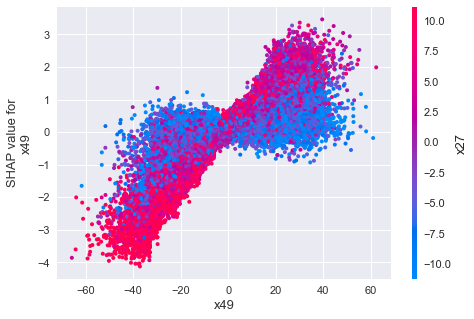

In [126]:
shap.dependence_plot("x49", shap_values, X_train_transformed)

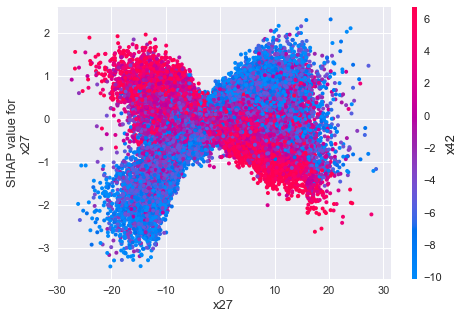

In [127]:
shap.dependence_plot("x27", shap_values, X_train_transformed)
# This is interesting. It states that x27 has a mixed correlation to the output.
# When x42 is high (red), x27 has a negative correlation with 'y' (y-axis vs x-axis)
# When x42 is low (blue), x27 has a positive correlation with 'y' (y-axis vs x-axis)
# It is important to note that "Correlaion is not the same as Causation"

#### Individual Observation Interpretibility

In [138]:
?get_config

In [130]:
X_test_transformed= get_config('X_test')
# X_test_transformed.info()

In [133]:
# predict_model(best_model, data=X_test_transformed)

In [168]:
# Get the predictions and put them with the test data.
X_output = X_test_transformed.copy()
# X_output.loc[:,'predict'] = np.round(best_model.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,330,50) # Every 50 rows
S = X_output.iloc[random_picks]
S

x0         x1         x3         x4         x5         x7  \
65994  -0.089026   4.739374  -7.616577  -2.017990  10.699079  -6.058542   
101634 -0.372234  -1.540867  -2.838008   1.262614 -13.563667 -33.387394   
108956  0.320491   0.354088 -14.158455 -17.671486  -3.692270  -4.049163   
78612   0.354782   4.481230 -15.937026  -2.018381 -11.890825 -73.281990   
57291   0.739714  -3.030419   6.457521  -9.965528  -6.408630  46.128246   
20386  -0.185871  11.293899   5.748356   9.490390   3.082972 -40.673294   
105607  0.028082   2.904887   6.538821   4.733573   1.664429 -20.943357   

               x8        x9        x10       x11        x12        x13  \
65994  -10.889321 -2.129038   6.684869  3.739051 -16.786537   6.380620   
101634  -7.553047 -3.021774   5.033779  4.916846   8.986561   4.910282   
108956  13.038754  5.734336 -13.927984  2.710987   0.711900  -2.876606   
78612   -0.053412 -0.848773  12.343312 -6.782266  21.500002 -10.127199   
57291   -9.660893 -7.095620  -1.111253 -7.256639 -13.154021   8.658904   
20386   16.613768  6.402008   2.565773 -5.854484  28.357891 -12.973138   
105607  -9.667617  3.724478  13.791682 -0.965256  -6.960405  -2.584804   

              x14       x15        x16        x17       x18       x19  \
65994    5.700069 -0.423682  -6.379070  -6.251503  7.572686  6.008775   
101634  -6.705784  1.658855   2.314796  -4.544127  1.317403 -6.383151   
108956  -0.917184 -9.944821  -4.520051  -1.530008 -1.672284  9.659294   
78612  -20.445732  1.443591   5.413263   3.448930  3.785208  2.094509   
57291    0.798776  1.118601  -6.157115  -2.779254  0.183822  8.570121   
20386    2.781461  0.563202   3.527433 -11.523575  3.635985  5.835440   
105607  -7.644707 -0.672148  10.141855  13.422267  9.170076  9.374360   

              x20        x21       x22        x23       x25       x26  \
65994   -1.666710  -5.642594  6.458951 -27.892736  0.111243  0.476276   
101634  12.753813   2.691199  9.357132   7.592684  1.931756 -1.078921   
108956  -4.366886   3.696527 -2.867880 -17.403919 -1.828657  1.159590   
78612   -7.666292  -7.395347  1.192707   7.217518 -1.605109  0.117184   
57291  -12.483521  24.268553  9.088618 -30.368433  0.309080  1.628763   
20386    2.278329 -10.182217 -2.035278  -2.846613 -0.517035 -0.304703   
105607  -0.784112   2.312173 -3.357215  19.793144  0.403275  0.554286   

             x27        x28       x31   x32       x33        x34       x35  \
65994   0.174232 -26.517925  1.952681  0.00  1.558743   9.752279  3.876970   
101634 -3.836928  -3.203198  1.831941  0.00  0.140038 -11.406950  3.575320   
108956  1.405075   5.038990  4.245373  0.00  0.486238   0.553396  4.063229   
78612   6.132580  15.210444 -2.553059 -0.02  0.345521   5.842415 -1.248642   
57291  -4.253786   8.544832 -2.893732  0.03  1.114064   8.578664  2.587216   
20386   8.658607   0.867422  0.868168 -0.01 -1.739632  -5.935196  0.121448   
105607 -0.224765   2.820857 -1.670925 -0.01 -1.300144 -12.729988  7.061868   

             x36          x37       x39        x40        x41        x42  \
65994  -0.598909  1482.069946 -0.053527   9.896921  36.519569   5.569344   
101634  0.178979 -1072.839966  2.473956 -32.466343   4.881924  -4.495597   
108956 -0.229355  -897.690002  2.814007  30.647497  -0.965450 -14.416189   
78612  -1.034358   386.130005 -2.568118  -7.377167  43.798779  -9.499569   
57291  -1.295115  -357.829987 -2.248326  30.289764  14.782884  -1.317773   
20386  -0.402534  -889.229980  1.396580 -17.043119 -15.221299  -1.248744   
105607  0.479456   749.539978  1.658882 -14.260712  22.771032  -0.019102   

             x43       x44       x45        x46        x47       x48  \
65994  -1.237456  4.765500  0.576863  32.415173 -10.561395  2.365431   
101634  1.626867  5.803392 -0.225016 -27.370306  -5.365592  0.813214   
108956  1.494032  3.013931 -0.395462 -79.473831  -4.585396  2.218268   
78612   0.018420 -2.921099  0.039178  22.953993   2.208094  2.309674   
57291   0.022300  1.933771 -0.665619 -27.073843   4.0338

In [169]:
# https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(best_model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

# Let me walk you through the above code step by step.
# The above shap.force_plot() takes three values: 
#   - the base value (explainerModel.expected_value[0])
#   - the SHAP values (shap_values_Model[j][0]) and
#   - the matrix of feature values (S.iloc[[j]]).
#   The base value or the expected value is the average of the model output over the training data X_train.
#   It is the base value used in the following plot.

In [170]:
shap_plot(0)

**Let me describe this elegant plot in great detail:**

  - The output value (f(x) is the prediction for that observation (the prediction of the first row).
  - The base value: The original paper explains that the base value E(y_hat) is "the value that would be predicted if we did not know any features for the current output." In other words, it is the mean prediction, or mean(yhat). You may wonder why it is -0.5163. This is because the mean prediction of Y_test is -0.5163. You can test it out by Y_test.mean() which produces -0.5163. NOTE that the original explanation in the article was for a regression problem. For a categorical problem, we may have to take some transformation such as logit (or somethig else). Also in the original article, it says output and here it says f(x) so that may also be the difference.
  - Red/blue: Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.
  - `x23` is negatively correlated to `y`. `mean(x23)` = 0.731136. In this obs, `x23` = -27.89. Since this is below the mean, and it is negatively correlated, it ends pushing the final prediction value higher.
  - `x7` is also negatively correlated to `y`. `mean(x7)` = -7.74. In this obs, `x7` = -6.059 which is above average, hence it is pushing the output lower.
    You may wonder how we know the average values of the predictors. Remember the SHAP model is built on the training data set. The means of the variables are: X_train.mean()

In [158]:
y_test= get_config('y_test')
y_test.mean()

0.4016099120072604

In [167]:
# Mean Train Values used in explaining above
pd.DataFrame(X_train_transformed.mean()).T

x0        x1        x3       x4        x5        x7        x8  \
0 -0.000279  0.008154 -0.030629 -0.02018  0.001805 -7.741145 -0.018226   

         x9       x10       x11       x12       x13       x14       x15  \
0  0.017265 -0.005323  0.042266 -1.362606 -0.011531 -0.004523 -0.001954   

        x16       x17       x18       x19       x20       x21       x22  \
0  0.009035  0.007914  0.018351  0.021209  0.299522 -0.045886 -0.000856   

        x23       x25       x26       x27       x28      x31       x32  \
0  0.731136 -0.004293  0.000195  0.001182  0.004553 -0.00969  0.000015   

        x33       x34       x35       x36       x37       x39       x40  \
0 -0.005641 -0.003105  0.002177  0.010048 -1.580434  0.017416 -2.295176   

        x41       x42       x43       x44       x45        x46       x47  \
0  6.706611 -1.858142  0.000887 -0.004321  0.000338 -12.904022  0.040407   

        x48       x49  x24_america  x24_asia  x24_euorpe   x29_Apr   x29_Aug  \
0  0.004687 -0.710508     0.028312  0.868424    0.103264  0.042754  0.183928   

    x29_Dev   x29_Feb  x29_January  x29_July   x29_Jun   x29_Mar   x29_May  \
0  0.000148  0.000888     0.000059  0.285841  0.258042  0.007586  0.136242   

    x29_Nov   x29_Oct  x29_sept.  x30_friday  x30_monday  x30_thurday  \
0  0.002121  0.014985   0.067406    0.003522    0.003137      0.18378   

   x30_tuesday  x30_wednesday  
0     0.174488       0.635073

### Retrains on entire train dataset

In [44]:
final_model_baseline = finalize_model(best_model)

### Check final performance

In [45]:
unseen_predictions = predict_model(final_model_baseline, data=test)
unseen_predictions.head()

x0         x1        x3         x4         x5         x7         x8  \
0 -0.226706  11.350364  5.182092  -2.236454  10.716248 -15.900329  -0.178002   
1 -0.333224   1.138614  0.104432   0.819080   6.936425  37.988706   4.517952   
2 -0.479265  -1.085311  5.535042  -5.157181  -1.608268 -33.507600  26.144811   
3  0.140972 -13.770815  1.282171 -10.314443  -2.140678 -32.697867 -12.569104   
4  0.466752  10.563190  2.027941   2.226414  17.927492  34.170205  -0.316748   

          x9        x10        x11  ...       x43       x44       x45  \
0  10.901306  -0.090170  -6.062488  ... -2.064860  0.923879  0.331452   
1  17.467962   6.692915 -21.920142  ...  1.938380 -5.395413  0.459957   
2  -1.866048   3.351425  -3.272850  ... -0.984782  1.954579  0.383549   
3  -0.510527  -0.622231  -9.892130  ...  1.088224 -2.185282 -0.230979   
4   8.300755  21.643071   9.464095  ...  0.065431  1.069949  0.827266   

         x46        x47       x48        x49  y  Label   Score  
0  19.172365   5.752749 -2.609553 -20.320179  0      0  0.9975  
1 -77.491333   0.754309 -0.442017 -21.824215  1      1  0.7324  
2  -1.467533  13.830803 -2.831817   9.343167  0      0  0.9914  
3  21.335008  -1.517562 -0.445338   9.285682  0      0  0.8182  
4  -0.006643  -7.881300 -1.019437   7.875589  0      1  0.5544  

[5 rows x 51 columns]

In [46]:
# from pycaret.utils import check_metric
# check_metric(unseen_predictions['y'], unseen_predictions['Label'], metric = 'fp10_fn500')
np.round(fp10_fn500_func(y_test=unseen_predictions['Label'], y_pred=unseen_predictions['y']),2)

17.0

### Tune Best Model

#### XGBoost

In [47]:
xgboost = create_model('xgboost')

In [48]:
# ?tune_model

In [52]:
?np.random.random

In [91]:
np.random.seed(42)
params = {
    "min_child_weight": np.random.randint(5, 10, 10),    
    "max_depth": np.ceil(np.random.random(10)*20).astype(int).tolist(),
    "n_estimators": np.ceil(np.random.random(10)*200).astype(int).tolist()
}
params

{'min_child_weight': array([8, 9, 7, 9, 9, 6, 7, 7, 7, 9]),
 'max_depth': [13, 15, 1, 20, 17, 5, 4, 4, 7, 11],
 'n_estimators': [87, 59, 123, 28, 59, 74, 92, 158, 40, 103]}

In [92]:
# https://pycaret.org/tune-model/

# tuned_xgboost = tune_model(xgboost)  # Severely Overfits on completely unseen dataset
# tuned_xgboost = tune_model(xgboost, search_library='scikit-optimize') # Severely Overfits on completely unseen dataset

# tune hyperparameters with custom_grid to reduce overfitting
# https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster
start = time()
tuned_xgboost = tune_model(xgboost, custom_grid=params)
end = time()

In [93]:
print(f"Training Time: {end-start}s")

Training Time: 314.58744764328003s


In [94]:
xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=0)

In [95]:
tuned_xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=15,
              min_child_weight=8, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=123, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=0)

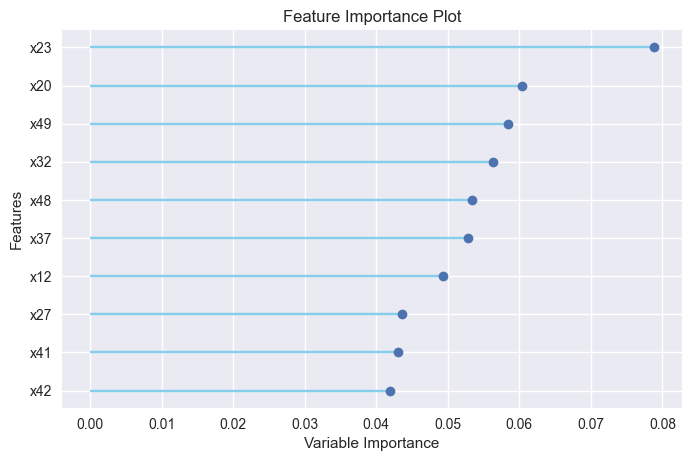

In [96]:
plot_model(tuned_xgboost, plot='feature')

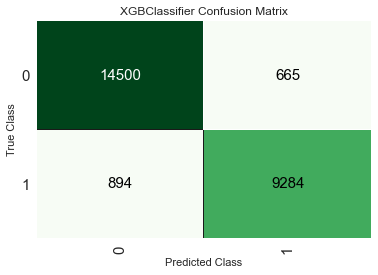

In [97]:
plot_model(tuned_xgboost, plot = 'confusion_matrix')

In [98]:
final_model_tuned = finalize_model(tuned_xgboost)

In [99]:
unseen_predictions = predict_model(final_model_tuned, data=test)
unseen_predictions.head()

x0         x1        x3         x4         x5         x7         x8  \
0 -0.226706  11.350364  5.182092  -2.236454  10.716248 -15.900329  -0.178002   
1 -0.333224   1.138614  0.104432   0.819080   6.936425  37.988706   4.517952   
2 -0.479265  -1.085311  5.535042  -5.157181  -1.608268 -33.507600  26.144811   
3  0.140972 -13.770815  1.282171 -10.314443  -2.140678 -32.697867 -12.569104   
4  0.466752  10.563190  2.027941   2.226414  17.927492  34.170205  -0.316748   

          x9        x10        x11  ...       x43       x44       x45  \
0  10.901306  -0.090170  -6.062488  ... -2.064860  0.923879  0.331452   
1  17.467962   6.692915 -21.920142  ...  1.938380 -5.395413  0.459957   
2  -1.866048   3.351425  -3.272850  ... -0.984782  1.954579  0.383549   
3  -0.510527  -0.622231  -9.892130  ...  1.088224 -2.185282 -0.230979   
4   8.300755  21.643071   9.464095  ...  0.065431  1.069949  0.827266   

         x46        x47       x48        x49  y  Label   Score  
0  19.172365   5.752749 -2.609553 -20.320179  0      0  0.9997  
1 -77.491333   0.754309 -0.442017 -21.824215  1      1  0.9531  
2  -1.467533  13.830803 -2.831817   9.343167  0      0  0.9989  
3  21.335008  -1.517562 -0.445338   9.285682  0      0  0.9429  
4  -0.006643  -7.881300 -1.019437   7.875589  0      1  0.9081  

[5 rows x 51 columns]

In [105]:
# Confusion Matrix on completely unseen data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=unseen_predictions['Label'], y_pred=unseen_predictions['y'])

array([[18196,   997],
       [  825, 11660]], dtype=int64)

In [100]:
np.round(fp10_fn500_func(y_test=unseen_predictions['Label'], y_pred=unseen_predictions['y']),2)

13.34

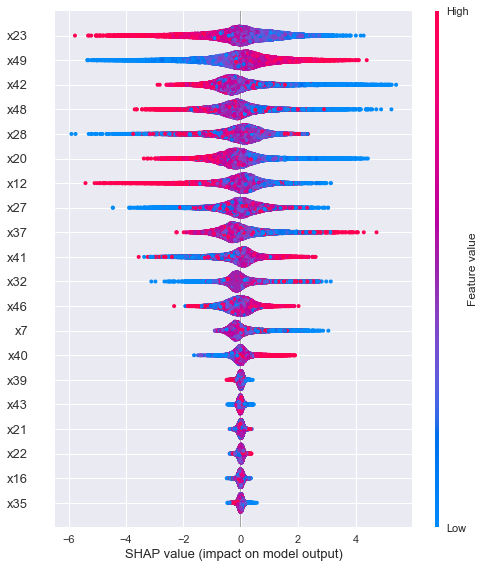

In [101]:
# SHAPLEY Explanation:
# https://www.analyticsvidhya.com/blog/2019/11/shapley-value-machine-learning-interpretability-game-theory/
# This shows the Shap values on the x-axis. 
# Here, all the values on the left represent the observations that shift the predicted value in the negative direction 
# while the points on the right contribute to shifting the prediction in a positive direction. 
# All the features are on the left y-axis.

interpret_model(final_model_tuned, plot = 'summary')

#### Catboost (trial)

In [106]:
catboost = create_model('catboost')

In [107]:
# https://pycaret.org/tune-model/
# https://github.com/pycaret/pycaret/releases

# tuned_catboost = tune_model(catboost, search_library='scikit-optimize')  # Does not work
# Fine tuning may need a custom grid like in the case of XGboost
tuned_catboost = tune_model(catboost)

In [108]:
catboost.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'grow_policy': 'SymmetricTree',
 'boosting_type': 'Plain',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'devices': '-1',
 'pinned_memory_bytes': '104857600',
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'model_size_reg': 0.5,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 42,
 'depth': 6,
 'border_count': 32,
 'min_fold_size': 100,
 'data_partition': 'DocParallel',
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'min_data_in_leaf': 1,
 'add_ridge_penalty_to_loss_function': False,
 'loss_function': 'Logloss',
 'learning_rate': 0.026148

In [109]:
tuned_catboost.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'Logloss',
 'iterations': 120,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'grow_policy': 'SymmetricTree',
 'boosting_type': 'Plain',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'devices': '-1',
 'pinned_memory_bytes': '104857600',
 'l2_leaf_reg': 6,
 'random_strength': 0.30000001192092896,
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'model_size_reg': 0.5,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 42,
 'depth': 8,
 'border_count': 32,
 'min_fold_size': 100,
 'data_partition': 'DocParallel',
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'min_data_in_leaf': 1,
 'add_ridge_penalty_to_loss_function': False,
 'loss_function': 'Logloss',
 'learnin

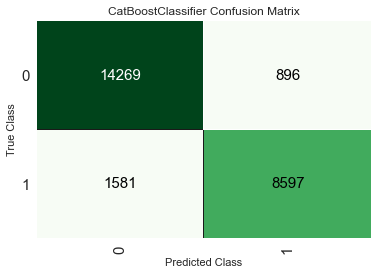

In [110]:
plot_model(tuned_catboost, plot = 'confusion_matrix')

In [111]:
final_model_tuned = finalize_model(tuned_catboost)

In [112]:
unseen_predictions = predict_model(final_model_tuned, data=test)
unseen_predictions.head()

x0         x1        x3         x4         x5         x7         x8  \
0 -0.226706  11.350364  5.182092  -2.236454  10.716248 -15.900329  -0.178002   
1 -0.333224   1.138614  0.104432   0.819080   6.936425  37.988706   4.517952   
2 -0.479265  -1.085311  5.535042  -5.157181  -1.608268 -33.507600  26.144811   
3  0.140972 -13.770815  1.282171 -10.314443  -2.140678 -32.697867 -12.569104   
4  0.466752  10.563190  2.027941   2.226414  17.927492  34.170205  -0.316748   

          x9        x10        x11  ...       x43       x44       x45  \
0  10.901306  -0.090170  -6.062488  ... -2.064860  0.923879  0.331452   
1  17.467962   6.692915 -21.920142  ...  1.938380 -5.395413  0.459957   
2  -1.866048   3.351425  -3.272850  ... -0.984782  1.954579  0.383549   
3  -0.510527  -0.622231  -9.892130  ...  1.088224 -2.185282 -0.230979   
4   8.300755  21.643071   9.464095  ...  0.065431  1.069949  0.827266   

         x46        x47       x48        x49  y  Label   Score  
0  19.172365   5.752749 -2.609553 -20.320179  0      0  0.9835  
1 -77.491333   0.754309 -0.442017 -21.824215  1      1  0.5005  
2  -1.467533  13.830803 -2.831817   9.343167  0      0  0.9371  
3  21.335008  -1.517562 -0.445338   9.285682  0      1  0.5257  
4  -0.006643  -7.881300 -1.019437   7.875589  0      1  0.5803  

[5 rows x 51 columns]

In [113]:
np.round(fp10_fn500_func(y_test=unseen_predictions['Label'], y_pred=unseen_predictions['y']),2)

18.05

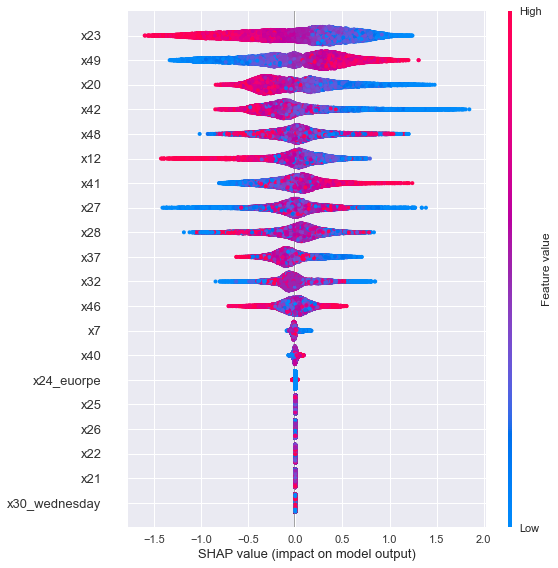

In [114]:
# SHAPLEY Explanation:
# https://www.analyticsvidhya.com/blog/2019/11/shapley-value-machine-learning-interpretability-game-theory/
# This shows the Shap values on the x-axis. 
# Here, all the values on the left represent the observations that shift the predicted value in the negative direction 
# while the points on the right contribute to shifting the prediction in a positive direction. 
# All the features are on the left y-axis.

interpret_model(final_model_tuned, plot = 'summary')

## Conclusions

* Default setting seems to be doing the best, although performing a grid search seems to get close enough results. 
* The grid search for xgboost had to limit the min_leaf_weight to a higher value to prevent overfiting in the model.

## Logs

In [172]:
logs = get_logs()
logs

run_id experiment_id    status  \
0    d186f9b27d544e9d96686a18e4e68c9e             1  FINISHED   
1    ec249ba3539b487482f95f0de7a6d832             1  FINISHED   
2    605b3170292b473f8001a3e06b596118             1  FINISHED   
3    63dd59bdca43447c8cb8f9bcc1b88b53             1  FINISHED   
4    fe05afb67dc84ed78a3428eec5b5ce58             1  FINISHED   
..                                ...           ...       ...   
97   63c6c2b4bb164e28b9e61940b6c67c2e             1  FINISHED   
98   68781a28ebe3482faac34aa489e750e6             1  FINISHED   
99   e4e16e8c6de6422988bddfced3757713             1  FINISHED   
100  f2aadf1f4f5b418e8ebe7b6ac5d3afcc             1  FINISHED   
101  08442a8b87124634b8482b300848c99e             1  FINISHED   

                                          artifact_uri  \
0    file:///C:/Users/Nikhil/OneDrive%20-%20Souther...   
1    file:///C:/Users/Nikhil/OneDrive%20-%20Souther...   
2    file:///C:/Users/Nikhil/OneDrive%20-%20Souther...   
3    file:///C:/Users/Nikhil/OneDrive%20-%20Souther...   
4    file:///C:/Users/Nikhil/OneDrive%20-%20Souther...   
..                                                 ...   
97   file:///C:/Users/Nikhil/OneDrive%20-%20Souther...   
98   file:///C:/Users/Nikhil/OneDrive%20-%20Souther...   
99   file:///C:/Users/Nikhil/OneDrive%20-%20Souther...   
100  file:///C:/Users/Nikhil/OneDrive%20-%20Souther...   
101  file:///C:/Users/Nikhil/OneDrive%20-%20Souther...   

                          start_time                         end_time  \
0   2020-11-25 21:24:53.771000+00:00 2020-11-25 21:24:55.548000+00:00   
1   2020-11-25 21:24:35.529000+00:00 2020-11-25 21:24:37.222000+00:00   
2   2020-11-25 21:22:57.855000+00:00 2020-11-25 21:22:59.661000+00:00   
3   2020-11-25 21:13:23.735000+00:00 2020-11-25 21:13:26.084000+00:00   
4   2020-11-25 21:10:40.339000+00:00 2020-11-25 21:10:42.565000+00:00   
..                               ...                              ...   
97  2020-11-24 20:58:14.181000+00:00 2020-11-24 20:58:14.962000+00:00   
98  2020-11-24 20:58:12.732000+00:00 2020-11-24 20:58:14.084000+00:00   
99  2020-11-24 20:44:41.330000+00:00 2020-11-24 20:44:41.634000+00:00   
100 2020-11-24 20:42:09.128000+00:00 2020-11-24 20:42:09.464000+00:00   
101 2020-11-24 20:34:23.185000+00:00 2020-11-24 20:34:23.574000+00:00   

     metrics.Accuracy  metrics.Kappa  metrics.AUC  metrics.F1  metrics.MCC  \
0            0.902300        0.79450     0.964100    0.874400     0.795700   
1            0.902600        0.79510     0.964100    0.874700     0.796300   
2            0.925265        0.84384     0.975786    0.905728     0.844042   
3            0.938300        0.87120     0.981200    0.922400     0.871300   
4            0.935600        0.86550     0.979900    0.918900     0.865600   
..                ...            ...          ...         ...          ...   
97           0.921300        0.83560     0.974000    0.900700     0.835800   
98           0.925600        0.84440     0.975900    0.906100     0.844600   
99                NaN            NaN          NaN         NaN          NaN   
100               NaN            NaN          NaN         NaN          NaN   
101               NaN            NaN          NaN         NaN          NaN   

     metrics.Recall  metrics.TT  metrics.fp10_fn500  metrics.Prec  \
0          0.846800      3.1100           31.128100      0.903800   
1          0.847200      2.8500           31.035400      0.904100   
2          0.893935     15.3600           21.619404      0.917838   
3          0.913200     20.3100           17.697600      0.931800   
4          0.908900     16.5800           18.567600      0.929100   
..              ...         ...                 ...           ...   
97         0.888700      4.4467                 NaN      0.913000   
98         0.894200     15.8967                 NaN      0.918300   
99              NaN         NaN                 NaN           NaN   
100             NaN         NaN                 N

In [175]:
logs.iloc[0]['artifact_uri']

'file:///C:/Users/Nikhil/OneDrive%20-%20Southern%20Methodist%20University/SMU%20MSDS/202009/DS7333/ds7333_qtw/case_study_7/analysis/nikhil/mlruns/1/d186f9b27d544e9d96686a18e4e68c9e/artifacts'